In [139]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
wine_data = pd.read_csv("13-WineQT.csv")

In [141]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


fixed acidity,Sabit Asitlik,"Şarapta bulunan, buharlaşmayan asit miktarıdır (çoğunlukla Tartarik Asit). Toplam asitliğin önemli bir bileşenidir."

volatile acidity,Uçucu Asitlik,Buharlaşabilen asit miktarıdır (çoğunlukla Asetik Asit). Yüksek olması genellikle şarapta sirke tadı/kokusu anlamına gelir ve kalite düşüklüğü işaretidir.

citric acid,Sitrik Asit,"Az miktarda bulunur. Şaraba ""ferahlık"" ve ""lezzet"" katar. Yüksekliği veya düşüklüğü tat dengesini etkiler."

residual sugar,Kalan Şeker,"Fermantasyon sona erdikten sonra şarapta kalan şeker miktarıdır. Şarabın ne kadar ""tatlı"" olduğunu gösterir."

chlorides,Klorürler,"Şarapta bulunan tuz miktarını gösterir. Yüksek klorür (tuzluluk), şarabın tadını olumsuz etkileyebilir."

free sulfur dioxide,Serbest Kükürt Dioksit,"Şarabı oksidasyondan ve mikrobiyal bozulmadan korumak için kullanılan, serbest haldeki SO2 miktarıdır."

`total sulfur dioxide**,Toplam Kükürt Dioksit,"Serbest ve bağlı haldeki tüm SO2 miktarının toplamıdır. Çok yüksek değerler, şarabın tadını ""yanık kibrit"" gibi yapabilir."

density,Yoğunluk,Şarabın yoğunluğudur. Şeker ve alkol içeriği ile yakından ilişkilidir ve şarabın gövdesini etkiler.

pH,pH Değeri,"Şarabın asitlik-bazlık seviyesidir. Düşük pH daha asidik (keskin), yüksek pH ise daha az asidiktir. Şarabın rengini, stabilitesini ve tadını etkileyen önemli bir faktördür."

sulphates,Sülfatlar,"Şarap yapımında kükürt dioksitin bir türevi olarak kullanılan, bir şarap koruyucusudur."

alcohol,Alkol,"Şarabın hacimce alkol oranıdır. Genellikle daha yüksek alkol, daha dolgun gövde ve dolaylı olarak daha yüksek kalite ile ilişkilidir."

quality,Kalite Puanı,Duyusal (tadım) verilerle belirlenen hedef değişkendir. Genellikle 0 (çok kötü) ile 10 (mükemmel) arasında bir tam sayı puanıdır (sizin verinizde 3-8 arası).

Id,Kimlik,Her şarap örneği için benzersiz bir tanımlayıcı (ID) numarasıdır. Analizde kullanılmamalıdır.

In [142]:
wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [143]:
wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [144]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [145]:
wine_data[wine_data.duplicated()]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, Id]
Index: []

In [146]:
# Kalite değerlerinin puanlanması
wine_data["quality"].value_counts().sort_values(ascending=False)

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

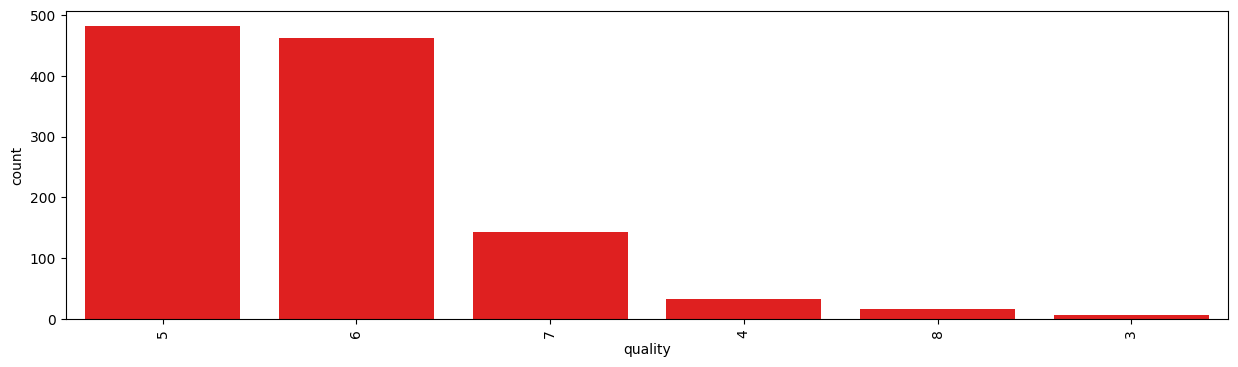

In [147]:
plt.figure(figsize=(15,4))
sns.countplot(x="quality", data=wine_data, order=wine_data["quality"].value_counts().index,color="r")
plt.xticks(rotation=90)
plt.show()

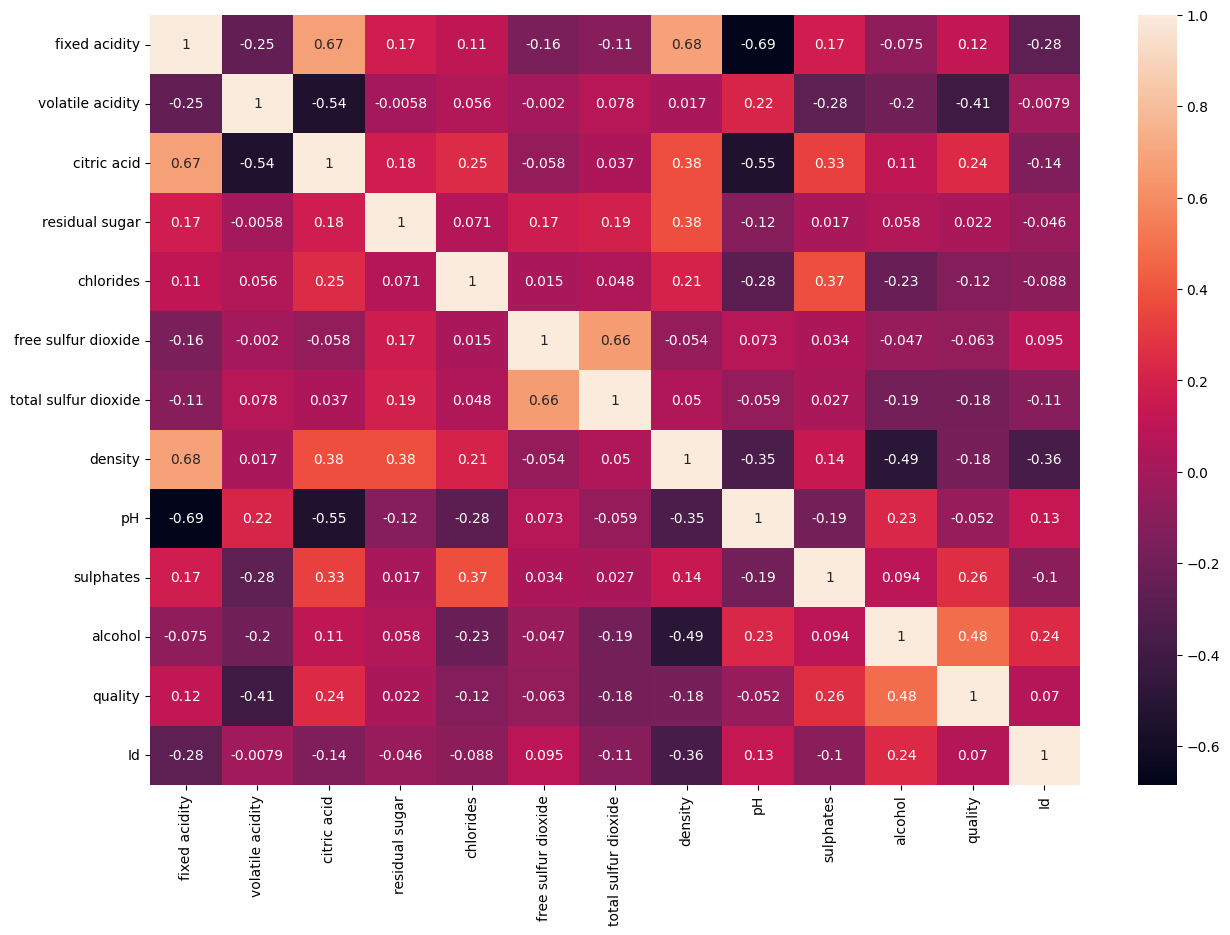

In [149]:
plt.figure(figsize=(15,10))
sns.heatmap(wine_data.corr(),annot=True)
plt.show()

In [ ]:
corr_matrix = wine_data.corr() #datanın korelasyonunu al ama bu korelasyonu qualitye göre yap
quality_corr = corr_matrix["quality"].sort_values(ascending=False)
quality_corr

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

<Axes: >

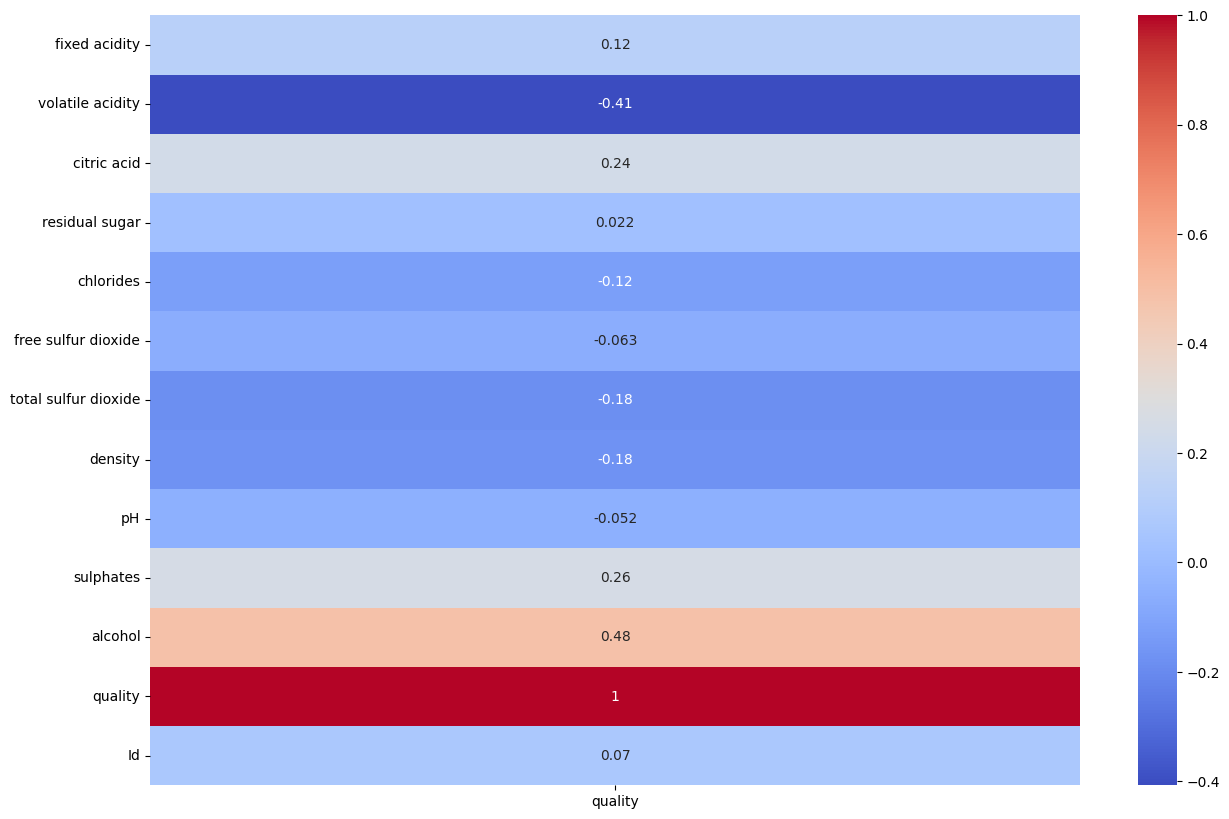

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix[["quality"]],annot=True,cmap="coolwarm",cbar=True)

Alkol kalitesi alkol oranı arttıkça artmış en güçlü pozitif ilişki var
Uçucu asitlik arttığında ise kalite ciddi şekilde düşer

C:\Users\Sanem\AppData\Local\Temp\ipykernel_18808\1732624449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality",y="alcohol",data=wine_data,palette="coolwarm")


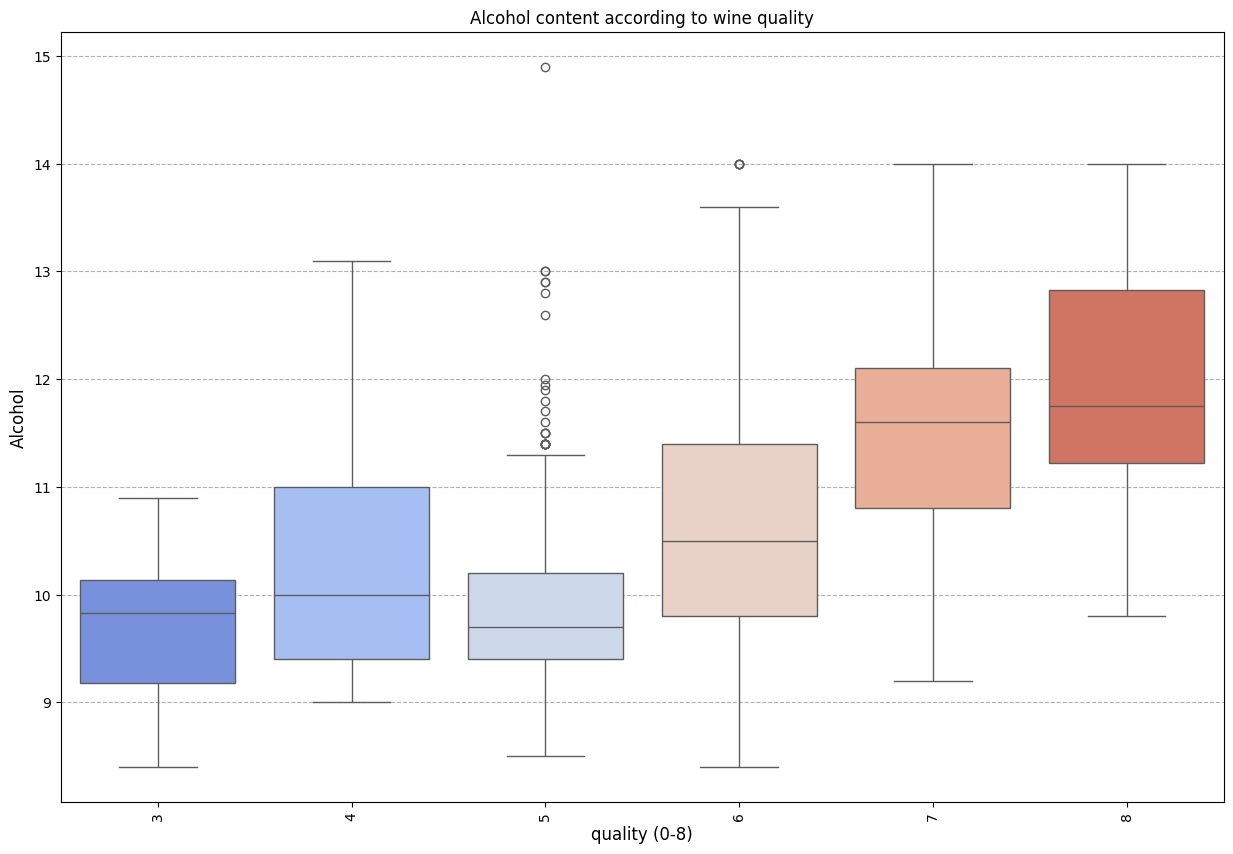

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x="quality",y="alcohol",data=wine_data,palette="coolwarm")
plt.title("Alcohol content according to wine quality")
plt.xlabel("quality (0-8)",fontsize=12)
plt.ylabel("Alcohol",fontsize=12)
plt.grid(axis="y",linestyle='--')
plt.xticks(rotation=90)
plt.show()

C:\Users\Sanem\AppData\Local\Temp\ipykernel_18808\923147845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality",y="volatile acidity",data=wine_data,palette="coolwarm")


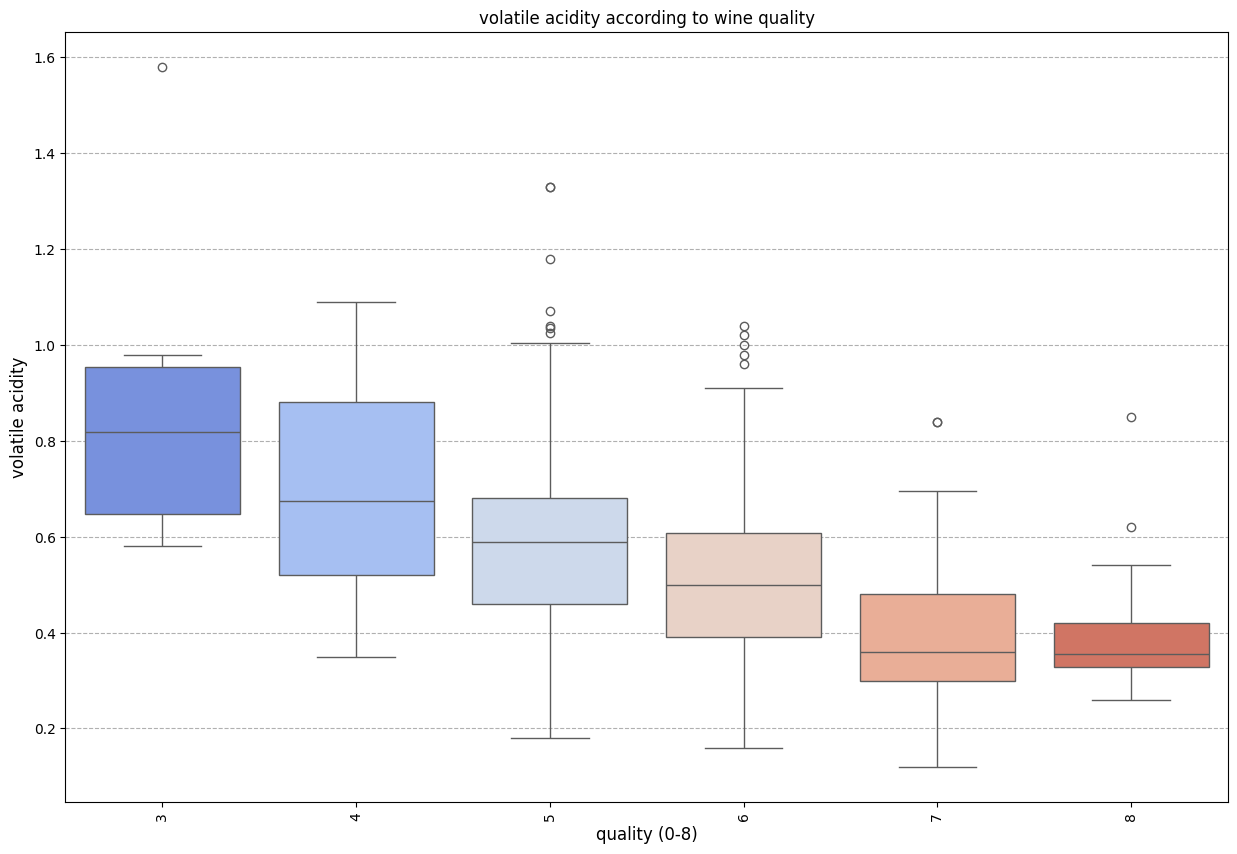

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x="quality",y="volatile acidity",data=wine_data,palette="coolwarm")
plt.title("volatile acidity according to wine quality")
plt.xlabel("quality (0-8)",fontsize=12)
plt.ylabel("volatile acidity",fontsize=12)
plt.grid(axis="y",linestyle='--')
plt.xticks(rotation=90)
plt.show()

C:\Users\Sanem\AppData\Local\Temp\ipykernel_18808\749184776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality",y="total sulfur dioxide",data=wine_data,palette="coolwarm")


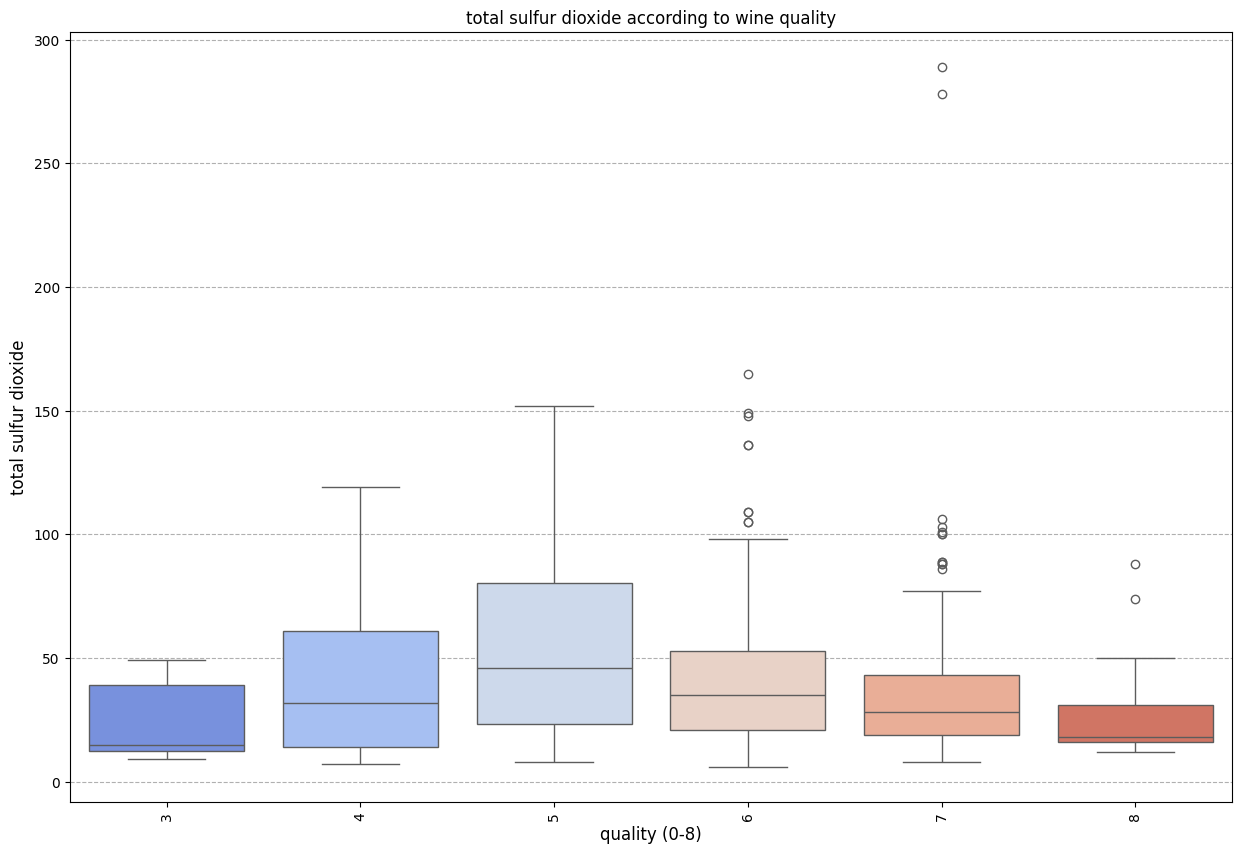

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x="quality",y="total sulfur dioxide",data=wine_data,palette="coolwarm")
plt.title("total sulfur dioxide according to wine quality")
plt.xlabel("quality (0-8)",fontsize=12)
plt.ylabel("total sulfur dioxide",fontsize=12)
plt.grid(axis="y",linestyle='--')
plt.xticks(rotation=90)
plt.show()

Aşırı yüksek kükürt dioksit içeren şarapların Kalite 3 ve 4 gruplarında yer almaması dikkat çekicidir. Bu, ya bu aşırı uç değerlerin kalitenin düşmesine tek başına yetmediği anlamına gelir, ya da bu şarapların Kalite 5 ve 6 seviyesine ulaşmak için yüksek miktarda koruyucu (SO2) gerektirdiği anlamına gelebilir.

In [ ]:
# Yüksek Kalite Bölgesi Hesaplama

high_quality = wine_data[wine_data["quality"] >= 7].copy() # yüksek kalite bölgesi tanımla
alc_ref = high_quality["alcohol"].median() # referans çizgisi
va_ref = high_quality["volatile acidity"].median() # referans çizgisi



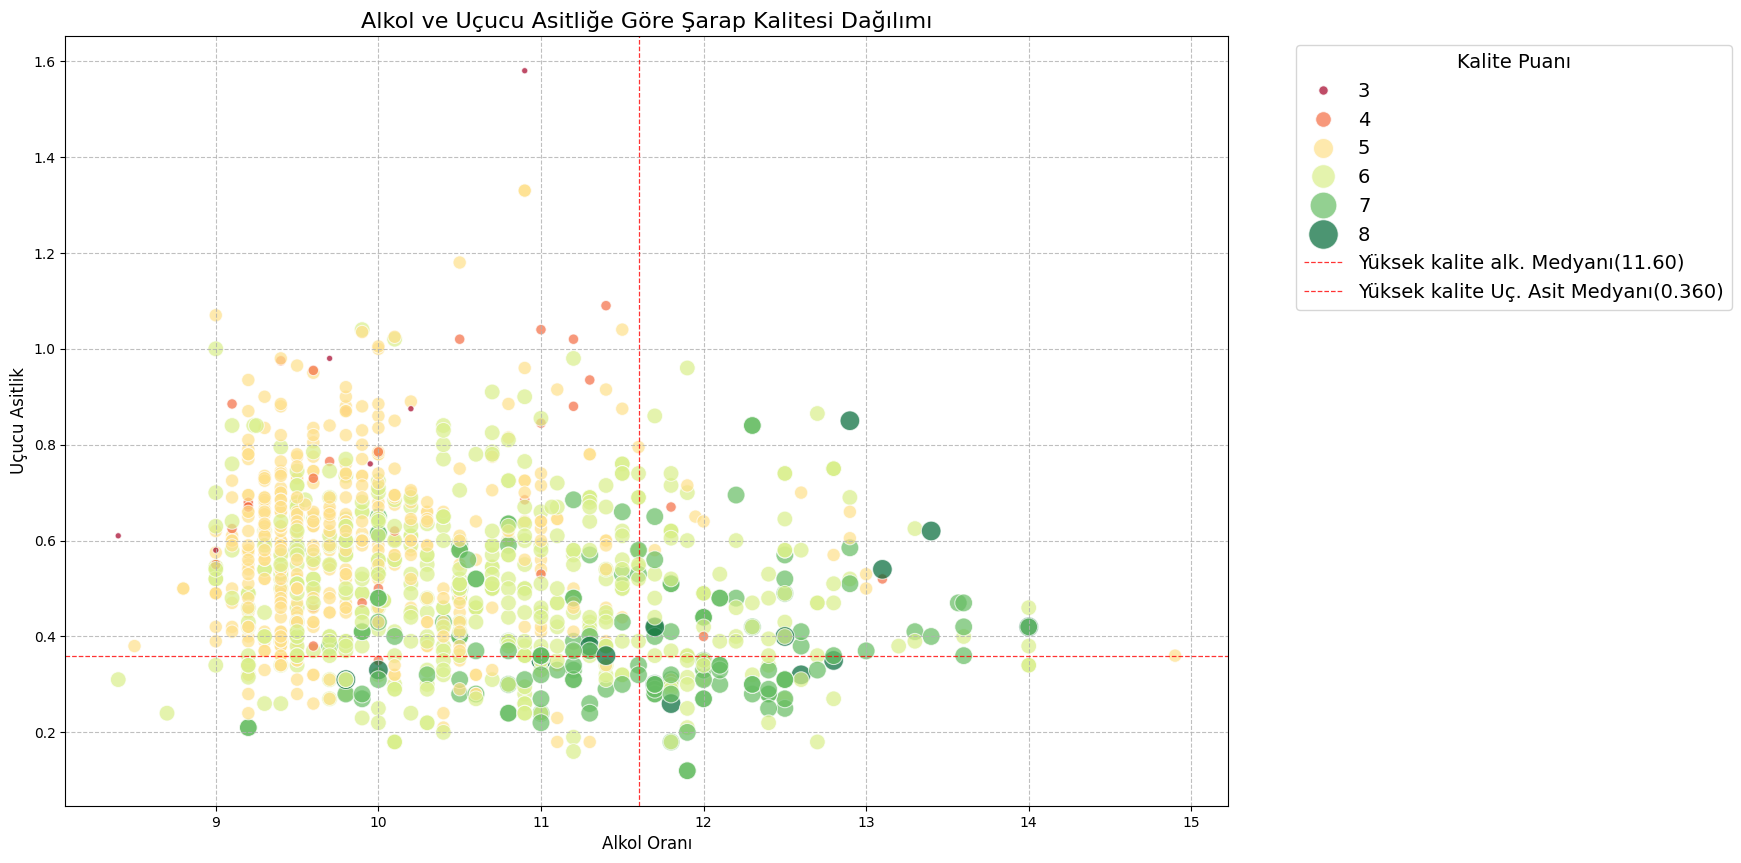

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="alcohol",y="volatile acidity",hue="quality",data=wine_data,palette="RdYlGn",size="quality",sizes=(20,200),alpha=0.7)
plt.xlabel("Alkol Oranı",fontsize=12)
plt.ylabel("Uçucu Asitlik",fontsize=12)
plt.title("Alkol ve Uçucu Asitliğe Göre Şarap Kalitesi Dağılımı",fontsize=16)

plt.axvline(x=alc_ref,color="r",linestyle="--",alpha=0.8,linewidth=0.9,label=f'Yüksek kalite alk. Medyanı({alc_ref:.2f})')
plt.axhline(y=va_ref,color="r",linestyle="--",alpha=0.8,linewidth=0.9,label=f'Yüksek kalite Uç. Asit Medyanı({va_ref:.3f})')


plt.legend(title='Kalite Puanı', bbox_to_anchor=(1.05,1),loc='upper left',fontsize=14,markerscale=1.5,title_fontsize=14)
plt.grid(True, linestyle='--',alpha=0.8)
plt.show()

C:\Users\Sanem\AppData\Local\Temp\ipykernel_18808\1064351486.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


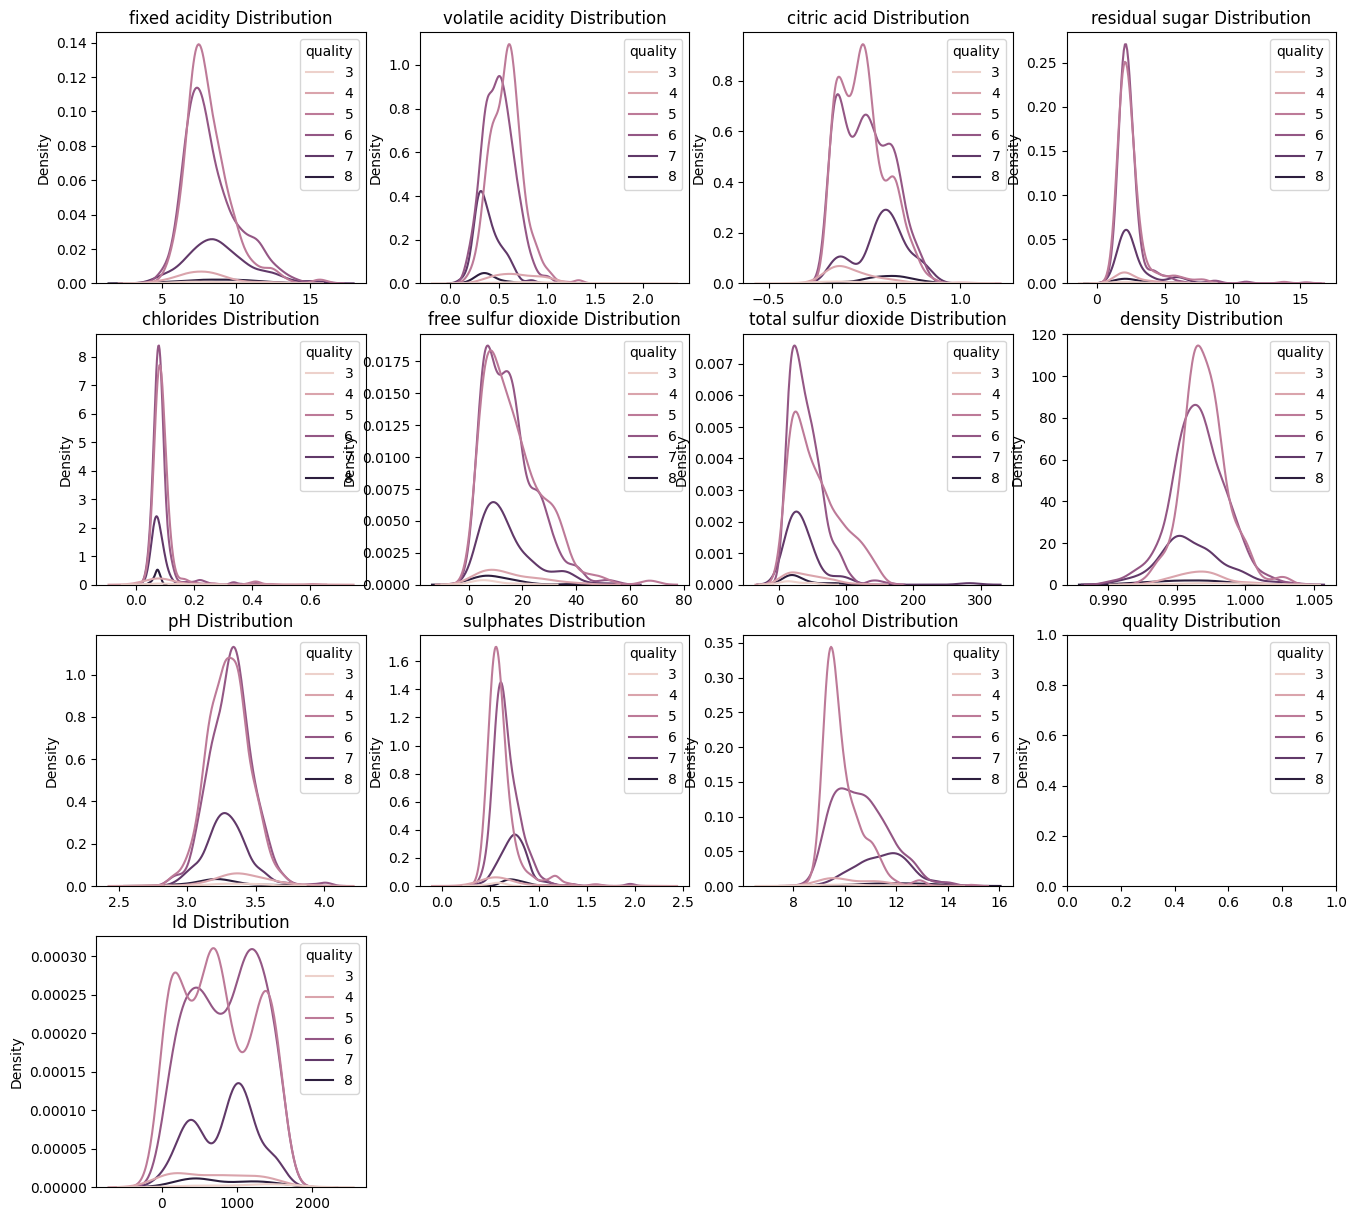

In [159]:
columns = wine_data.columns
(fig, ax) = plt.subplots(4,4,figsize=(16,15))
ax = ax.flatten() # axesler tek bir listede gelir

for i, column in enumerate(columns):
    sns.kdeplot(
        data=wine_data,
        x=column,
        hue=wine_data.quality,
        ax=ax[i]
    )

    ax[i].set_title(f"{column} Distribution")
    ax[i].set_xlabel(None)

for i in range(i+1,len(ax)):
    ax[i].axis("off")

In [ ]:
def is_good(quality):
    if quality >= 7:
        return 'Good'
    else:
        return 'Poor/Average(<7) '
    

In [ ]:
wine_data["is_good"] = wine_data["quality"].apply(is_good)

In [ ]:
wine_data.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id            is_good  
0      9.4        5   0  Poor/Average(<7)   
1      9.8        5   1  Poor/Average(<7)   
2      9.8        5   2  Poor/Average(<7)   
3      9.8        6   3  Poor/Average(<7)   
4      9.4        5   4  Poor/Average(<7)

In [ ]:
wine_data["is_good"].value_counts()

is_good
Poor/Average(<7)     984
Good                 159
Name: count, dtype: int64

In [ ]:
chemical_f = wine_data.drop(columns=["quality","Id"])
chemical_profile = chemical_f.groupby("is_good").mean().T.sort_values(by="Good",ascending=False)
chemical_profile

# datayı iyi ve kötü olarak gruplar, ve özelliklerin ortalamasını alır, veri çerçevesi yan olacağı için T ile transpose alınır
# good sütunundaki değerlere göre de büyükten küçüğe sıralanır

is_good                    Good  Poor/Average(<7) 
total sulfur dioxide  36.672956          47.408028
free sulfur dioxide   14.188679          15.846037
alcohol               11.528407          10.266582
fixed acidity          8.846541           8.224593
pH                     3.282453           3.315630
residual sugar         2.748428           2.497205
density                0.996019           0.996845
sulphates              0.745849           0.643465
volatile acidity       0.395314           0.553318
citric acid            0.391195           0.248516
chlorides              0.074711           0.088908

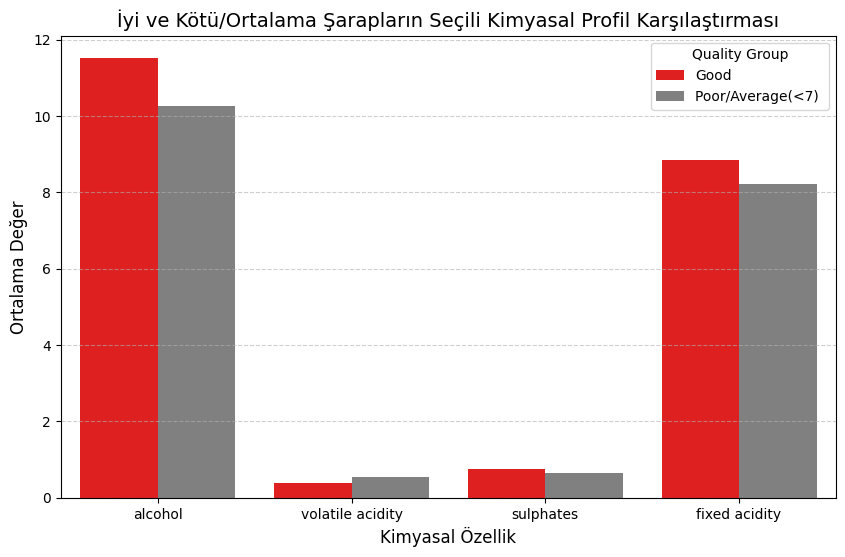

In [ ]:
#önceki veri çerçevesini oluştururken etiketler satır halindeydi ve bu etiket isimlerini alabilmek için loc kullandık
# reset_index ise özellik adını indeksten alıp normal bir sütun olarak tabloya ekleyerek görselleştirmeye hazır hale getirir
plot_data = chemical_profile.loc[['alcohol','volatile acidity', 'sulphates', 'fixed acidity']].reset_index()
plot_data.rename(columns={'index':'Feature'},inplace=True)

plot_data = pd.melt(plot_data,id_vars="Feature",var_name="Quality Group",value_name="Mean Value")

plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Mean Value', hue='Quality Group', data=plot_data, palette=['r', 'grey'])
plt.title('İyi ve Kötü/Ortalama Şarapların Seçili Kimyasal Profil Karşılaştırması', fontsize=14)
plt.xlabel('Kimyasal Özellik', fontsize=12)
plt.ylabel('Ortalama Değer', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

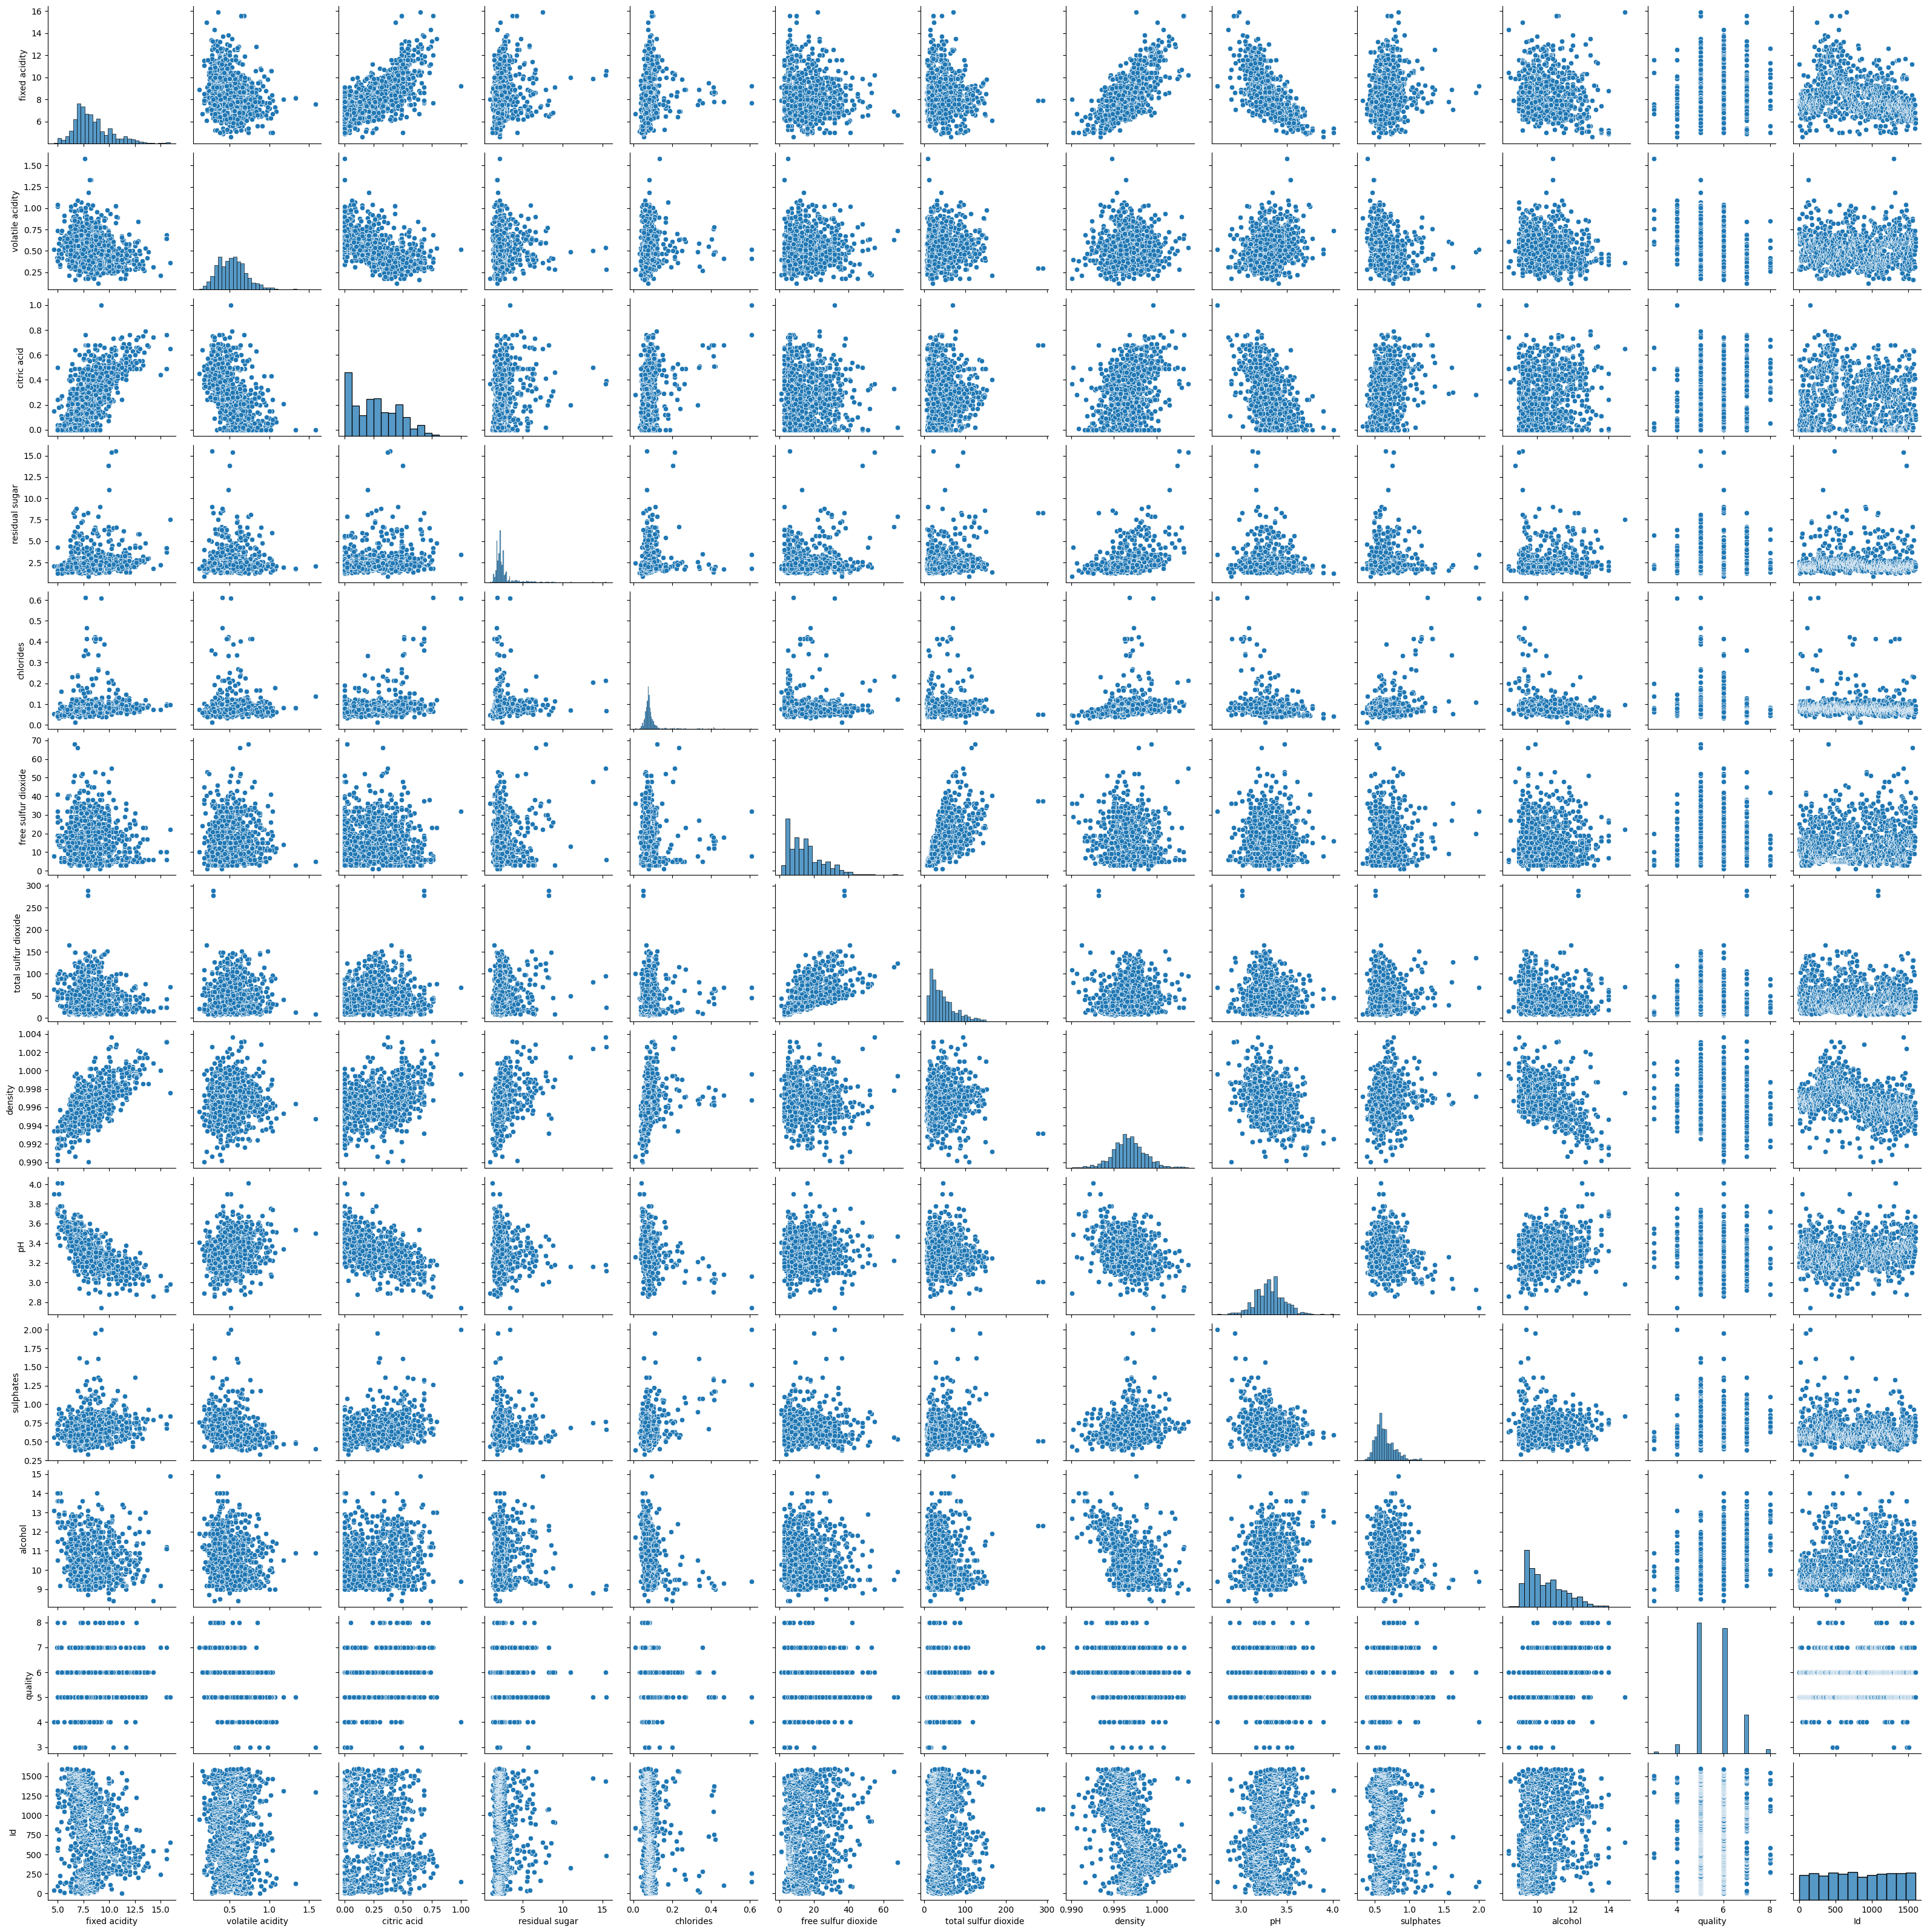

In [154]:
sns.pairplot(wine_data)
plt.show()

<Figure size 1500x1500 with 0 Axes>

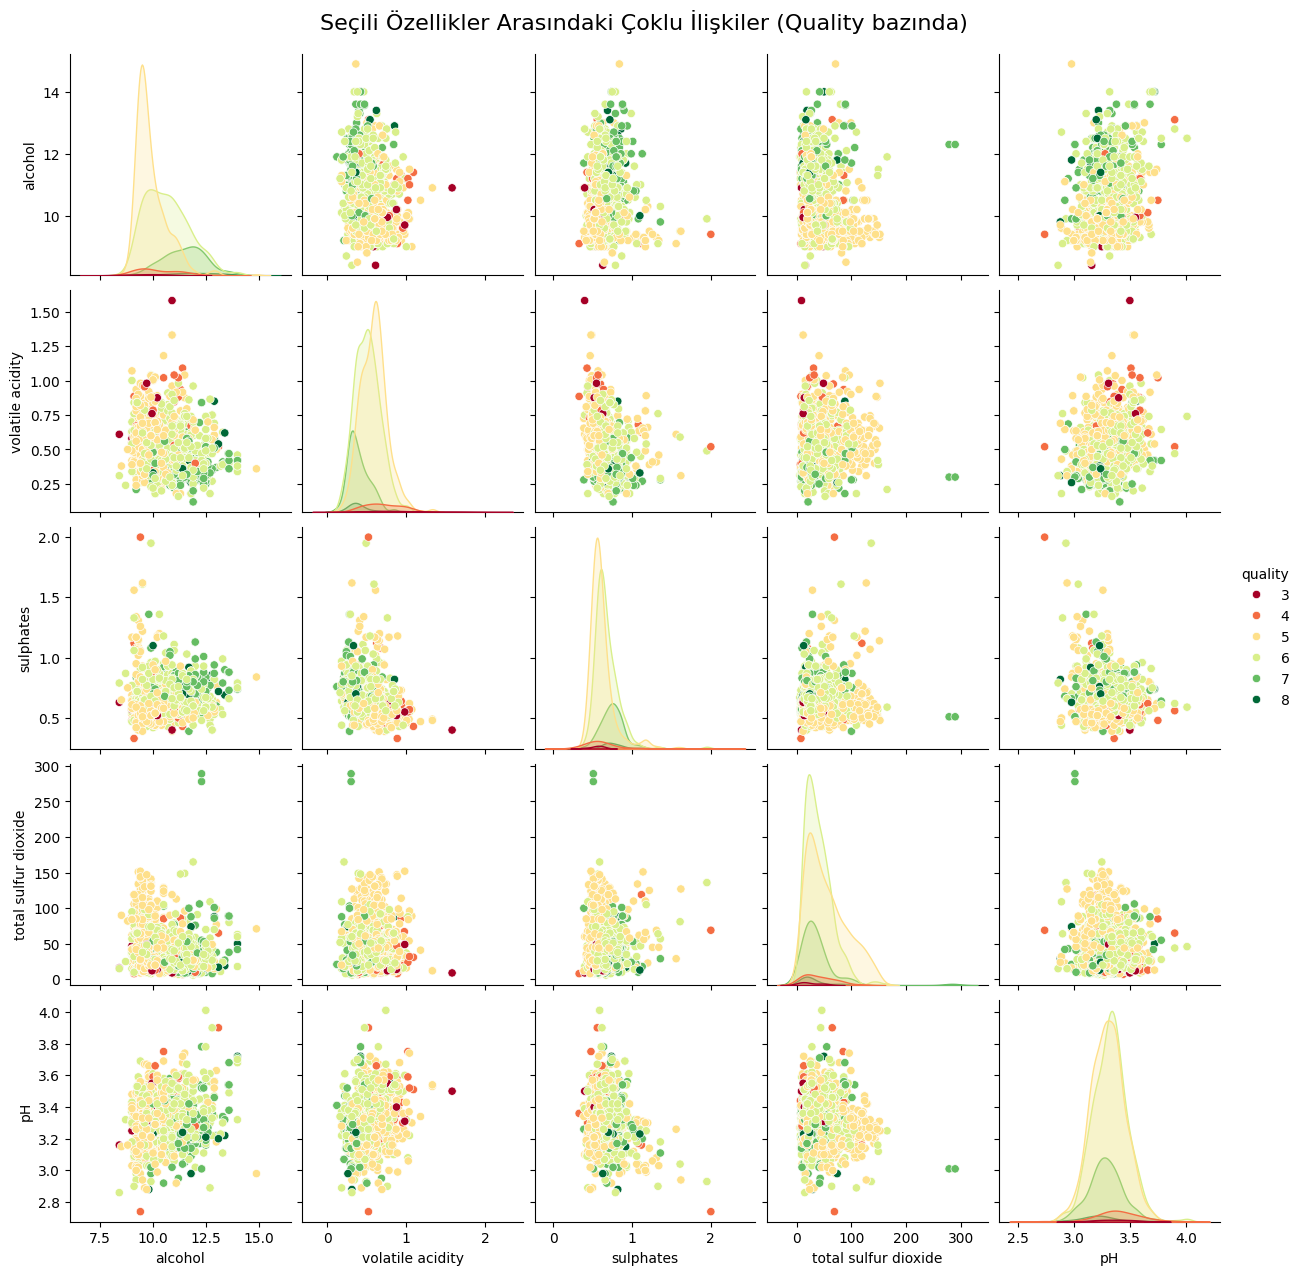

In [ ]:
features_for_pairplot = [
    'quality', 
    'alcohol', 
    'volatile acidity', 
    'sulphates', 
    'total sulfur dioxide',
    'pH'
]

plt.figure(figsize=(15, 15)) 
sns.pairplot(
    wine_data[features_for_pairplot], 
    hue='quality', 
    palette='RdYlGn', 
    diag_kind='kde',  # Köşegenlerde yoğunluk (KDE) grafiği kullanalım
    height=2.5 # Her bir küçük grafiğin boyutunu belirler
)

plt.suptitle('Seçili Özellikler Arasındaki Çoklu İlişkiler (Quality bazında)', y=1.02, fontsize=16)
plt.show()